#  Instructions (please read carefully): 

All answers should be included in this file, either in a Code or Markdown cell. Extras have been created to indicate where to respond, but you can add additional ones if you see fit. Do NOT delete any of the existing code/text.

Use provided code as you wish, write your own if you prefer. Do NOT delete any of the existing code/text.

All conceptual questions must be answered in a Markdown cell.

Allowed to use: All class notes, slides, Jupyter Notebooks, Homework solutions, tutorials.

Not allowed: <br>
i. General web, google, or other blogs etc., <br>
ii. Communicate with others during exam. <br>
iii. Share exam with others at ANY time. <br>

You are only allowed to communicate with F. Boukouvala during exam in case of major issues (i.e., power outage, something crashing/not working, etc. Use text at: 2012216380). Please state your name and issue in the text.

Because everyone is taking exam at a different time, no clarification questions will be answered on Piazza. Any posts will be deleted.

# Honor Code Statement (please provide electronic signature):

I agree to follow Georgia Tech's honor code and follow the instructions provided above. 


**Name:**

**Date:**

**Start time (EST):**

## Problem 1: Short Questions (25 points)

#### A. (10 points): 
Is the following function convex or nonconvex? $f(x_1,x_2, x_3) = x_1^2 + x_2^2 + x_3^2 +2x_1x_2 $

Don't type your entire solution, but verbally explain how you got to your mathematical answer (e.g., I calculated/derived ..., then formed, ... or I used property that states ..., etc.). After your text description of your approach, provide numerical values (if applicable, e.g., eigenvalues) that led you to your answer (again: do not need to show all steps for calculation using equations in markdown!). 

DO NOT answer this question by plotting. 


### Answer Here:

*The following terms are convex: x1^2+x2^2+2x1x2 = (x1+x2)^2 = convex. Also x3^2 is convex.* 

*The sum of convex functions is convex. *



#### B. (5 points): 

If the following problem is solved with IPOPT solver, will we always find the global minimum and why?

min $ x^{3} - 2x^{2} $ 

$ -1 \le x \le 2 $

### Answer Here:

*IPOPT is a local NLP solver. So if problem is convex, it will find global optimum, if problem is nonconvex, it may find it, or converge to a local optimum depending on initialization.* 

*Is problem convex or nonconvex?
It is nonconvex within [-1,2] because the second derivative expression is 6x-2 and this can take both positive and negative values.*

#### C. (5 points): 
Answer True of False: We are using a branch-and-bound algorithm to minimize a mixed-integer nonlinear programming problem. The current best lower bound is: LBbest = -10 and the current best upper bound is UBbest = 50. A node with a lower bound of LB = 51, can be pruned: 

### Answer Here:

*True*

(No need to justify to get points, but explanation is that since we know already that a possible solution is 50 (best upper bound), then there is no reason to search in the region where the lower bound is even higher).

#### D. (5 points): 
Answer True of False: We are representing 3 routes (1,2,3) in a design using binary variables
$y_{1}, y_{2}, y_{3} $
The following set of constraints are imposed: 
$y_{1} \ge y_{2} + y_{3} - 1 $ 

$ y_{1} \le y_{2} $

$ y_{1} \le y_{3} $

Using the above constraints, explain what logic these constraints represent.


### Answer Here:

*C2: If 1 is selected, then 2 must be selected. This rules out a solution where y1 = 1, and y2 = 0.
C3: If 1 is selected, then 3 must be selected. This rules out a solution where y1 = 1 and y3 = 0.
C1: This rules out solution where both 2 and 3 are selected y2=y3=1 and 1 is not, because 0 >= 1 is not true.*

*So if 1 is selected, only true option is for all to be selected.
If 1 is not selected, then selecting none, or one of 2/3 is an option, but not selecting both.*

## Problem 2: Linear Formulation & Pyomo solution (25 pts)

An experiment is conducted to collect data regarding the adsorption of methane on a zeolite. The adsorbed amount (C, mmol/g) is measured at different pressures (P, atm) and the data is given below. You are asked to fit a linear model to this data ($C=a+bP$), with a and b as the fitted parameters. </br>

A. Formulate and solve in Pyomo a **LINEAR PROGRAMMING (LP)** optimization problem, with the objective as the minimization of **sum of absolute values** (but you cannot have absolute values in your formulation because that would make the problem nonconvex). Use an appropriate solver for solving this problem. Report the solver termination condition, optimal parameters and objective function value. Code for reading the data, plotting the data, reporting termination condition is provided. </br>

B. Answer (as text in a Markdown Cell) the following: <br>
   (i) Assume we made the right decision to use a linear model, and use the sum of absolute errors as an objective. Is the solution you have found the globally optimal one, or could there be other solutions with a better error? If yes/no, why? <br>
   (ii) If we now reconsider the choices we have made above, is this a good fit to the data? Make ONE recommendation of what you would change to get a better fit.



Text(0, 0.5, 'C (mmol/g)')

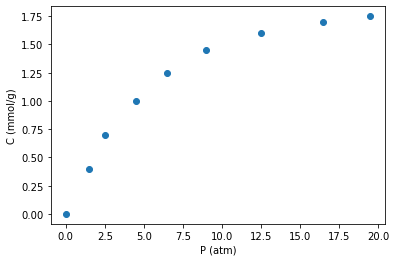

In [1]:
import numpy as np
from pyomo.environ import *
from pylab import *
from pyomo.opt import SolverStatus, TerminationCondition
import warnings
warnings.filterwarnings("ignore")

P = [0, 1.5, 2.5, 4.5, 6.5, 9, 12.5, 16.5, 19.5] #Pressure measurements
C = [0, 0.4, 0.7, 1, 1.25, 1.45, 1.6, 1.7, 1.75]  #Adsorbed Concentration measurements

# Plot data:
import matplotlib.pyplot as plt
plt.scatter(P,C)
plt.xlabel('P (atm)')
plt.ylabel('C (mmol/g)')

Termination condition: optimal
a: 0.0714
b: 0.5214
optimal sum of absolute errors: 1.8071


Text(0, 0.5, 'C (mmol/g)')

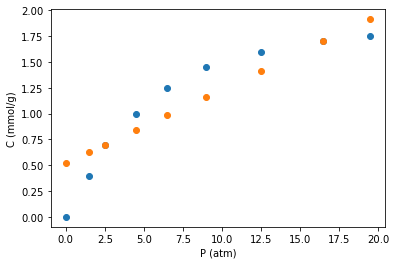

In [2]:
m = ConcreteModel()

S = list(range(9))

m.a = Var(within=Reals)
m.b = Var(within=Reals)
m.z = Var(S, within=NonNegativeReals)

# define constraints
def con1(m, i):
    return m.z[i] >= m.a*P[i] + m.b - C[i]
m.con1 = Constraint(S, rule=con1)

def con2(m, i):
    return m.z[i] >= - m.a*P[i] - m.b + C[i]
m.con2 = Constraint(S, rule=con2)

# define the objective function
def obj_rule(m):
    return sum(m.z[i] for i in S)
m.obj = Objective(rule=obj_rule, sense=minimize)

# solve the model
solver = SolverFactory('glpk')
results = solver.solve(m)

# print results
print(f"Termination condition: {results.solver.termination_condition}")
print(f"a: {value(m.a):.4f}")
print(f"b: {value(m.b):.4f}")
print(f"optimal sum of absolute errors: {value(m.obj):.4f}")

aopt = value(m.a)
bopt = value(m.b)

def cpred(press):
    return aopt*press + bopt

C_Pred = cpred(np.array(P))  
plt.scatter(P,C)
plt.scatter(P,C_Pred)
plt.xlabel('P (atm)')
plt.ylabel('C (mmol/g)')


#### Answer:
The problem is an LP, thus we used glpk solver and got a globally optimal solution. 
For this objective, we found the best solution possible.
However, the fit is not good. This was expected since the underlying data is not linear. To get a better fit, a nonlinear approximation model must be used, using a sum of squares objective is not going to get a much better fit. 


## Problem 3 (25 points): Mixed Integer Formulation (only formulation, no solution required)

You want to fit a regression function to a set of collected data (total data points collected ) to predict the temperature of a reactor (T) as a function of time (t) .

You do not know the best function that describes the data  (e.g., linear, quadratic, polynomial, exponential, combination of above terms etc,). For example, if the best fit was only linear, the final model would be:   
$ T = a_{0} + a_{1}t $

If the best fit was quadratic, the best model would be: 

$ T = a_{0} + a_{1}t + a_{2}t^{2} $

If both linear and exponential terms are required to fit a good model:   

$ T = a_{0} + a_{1}t + a_{2}exp(t) $

... and so on, and any combination of the following terms could be possible: 
$ [1, t, t^{2}, t^{3}, t^{4}, exp(t)] $

Write an optimization problem that will simultaneously select the optimal terms of the regression function and also optimize the parameters (coefficients) of the regression function. This mixed-integer nonlinear optimization problem should find the optimal  regression function that fits the data, that only contains at most 4 terms (the constant is considered a term). Clearly define your variables, objective, constraints. 

1. Any LINEAR combination of the above terms could be the best fit (assume only possibility is to sum these terms "as-is" multiplied by their corresponding parameter)
2. You want to keep the model as simple as possible,  so ensure at most 4 terms are selected in the final regression model.
3. To optimize the parameters, you can use a sum of squared errors objective.
4. The parameters/coefficients can take any value between -100 to 100.

! Get 2 bonus points if the only nonlinearity of your formulation must be in the objective function and not in the constraints !


Solution (just type here as you would write, no need to worry too much about writing very neat markdown equations): 
    
    Set: 
    i = 1,..., N (number of data points available)
    j = 1,..,6 (number of possible terms)
   
    Variables: 
    Binary variables y_j for every possible term (constant, linear, quadratic... etc)
    Real variable: Tpred_i : predictions of Temperature at points i = 1,...,N
    Real variables: a_j (parameters for every term)
        
    Parameters: 
    t_i: time points for which we have measurements i=1,..., N
    T_i: Temperature measured at time points i=1,...,N
        
    Objective: 
    min Sum (Tpred_i - T_i)^2   (sum of squared errors between predictions and measurements)
        
    Constraints:
    
    Tpred_i = a_1 + a_2*t_i + a_3*t_i^2 + a_4*t_i^3 + a_5*t_i^4 + a_6*exp(t_i) for i = 1,...,N
    (above is linear constraint because t_i is a parameter)
    
    -100*y_j <= a_j <= 100*y_j   for j = 1,..,6 
     sum_j (y_j) <= 4    (making sure all parameter values are within bounds and are switched off (=0), if the binary is 0/term not selected and only up to 4 can be selected.
    
    y_j = {0,1} (binaries)    
        
    

## Problem 4: Optimization of a 1d function using surrogates (25 points)

Assume that g(x) is a noisy black-box simulation that relates an output that must be minimized (y) to an input (x). This means we do not know the exact functional form of g(x) (even though in the next cell g(x) is given as a definition to allow you to collect data). 

min $g(x)$

$ -100 \le x \le 10 $

$ x + \frac{1}{100}x^{2} + \exp{\frac{x}{20}} $


Perform the following: 
1. Collect a reasonable number of data points from the simulation (not too few, not too many either if you consider what it affects with respect to the optimization formulation). 
2. Fit a quadratic model to the data you obtained using Pyomo.
3. Optimize the fitted quadratic model and compare the optimal solution you obtained with the true black-box optimum (x = -50.20, y=-24.92). Based on your solution, is the quadratic a good approximation of your b-b problem?


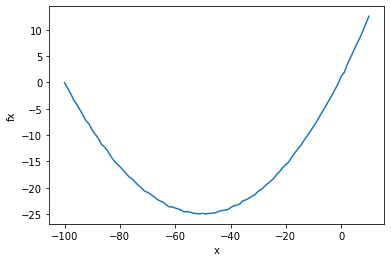

In [3]:
%matplotlib inline
from pylab import *
import numpy as np

def bbf(xin):
    return xin + (1/100)*xin**2 + exp(xin/20)  + np.random.normal(0, 0.1, len(xin)) 
 

x = linspace(-100,10,100)
y = bbf(x)
plot(x,y)
xlabel('x')
ylabel('fx')
show()


2 Set Declarations
    con_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    ypred_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

4 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 1.0641597585493714 :  None : False : False :  Reals
    a1 : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :  None : 1.033001026943665 :  None : False : False :  Reals
    a2 : Size=1, Index=None
        Key  : Lower : Value                : Upper : Fixed : Stale : Domain
        None :  None : 0.010227814959260197 :  None : False : False :  Reals
    ypred : Size=10, Index=ypred_index
        Key : Lower : Value             

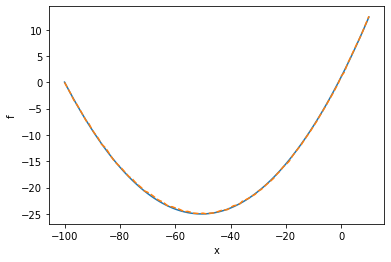

In [4]:
#Design of Experiments/Sampling for fitting:
xdoe = linspace(-100,10,10) # Collected 10 points is a reasobable assumption. 2 would be wrong because it is nonlinear function, 
                            # 3 would be too few but could work depending on where you place them, anything between 5 - 10 is ideal.
ydoe = bbf(xdoe)

mfit = ConcreteModel()

mfit.s = [1,2,3,4,5,6,7,8,9,10]
mfit.xact = {1:xdoe[0], 2:xdoe[1],3:xdoe[2],4:xdoe[3],5:xdoe[4],6:xdoe[5],7:xdoe[6],8:xdoe[7],9:xdoe[8],10:xdoe[9]}
mfit.yact = {1:ydoe[0], 2:ydoe[1],3:ydoe[2],4:ydoe[3],5:ydoe[4],6:ydoe[5],7:ydoe[6],8:ydoe[7],9:ydoe[8],10:ydoe[9]}

mfit.ypred = Var(mfit.s, within = Reals)
mfit.a0 = Var(within = Reals) #constant parameter
mfit.a1 = Var(within = Reals) #linear term parameter
mfit.a2 = Var(within = Reals) #quadratic term parameter


#Define Constraint & Objective:
def con_rule(mfit,i): # postulated function is: y=a + b*x_1 + c*x_2 + d*x_1*x_2
    return ((mfit.a0 + mfit.a1*mfit.xact[i] + mfit.a2*mfit.xact[i]**2) - mfit.ypred[i] == 0)

#Instead of defining the constraint as we did above, we now set it equal to the rule.
mfit.con = Constraint(mfit.s, rule=con_rule)

def obj_rule(mfit): 
    return sum((mfit.ypred[i]-mfit.yact[i])**2 for i in mfit.s)


#Instead of defining the objective as we did above, we now set it equal to the rule.
mfit.obj = Objective(rule=obj_rule) 

#same as above:
solver = SolverFactory('ipopt')
solver.solve(mfit)
mfit.pprint()
print(f"optimal sum of absolute errors: {value(mfit.obj):.4f}")

optimala0 = value(mfit.a0)
optimala1 = value(mfit.a1)
optimala2 = value(mfit.a2)

def surr(xin):
    return optimala0 + optimala1*xin + optimala2*xin**2

ysurr = surr(x)
plot(x,ysurr)
plot(x,y,'--')
xlabel('x')
ylabel('f')
show()

In [5]:
from pyomo.environ import *

model = ConcreteModel()
model.x = Var(within=Reals, bounds = (-100,10))

model.obj = Objective(expr= optimala0 + optimala1*model.x + optimala2*model.x**2)
solver = SolverFactory('ipopt')
solver.solve(model)
model.pprint()
print(f"global optimum: {value(model.obj):.4f}")

1 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value               : Upper : Fixed : Stale : Domain
        None :  -100 : -50.499595028319725 :    10 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 1.0641597585493714 + 1.033001026943665*x + 0.010227814959260197*x**2

2 Declarations: x obj
global optimum: -25.0189


#### Answer: 

The fit is almost perfect, so this model is well approximated by a quadratic function within this range.
When we optimize the quadratic function, we get really close to the global minimum, as expected.

# The End.. THANK YOU and GOOD LUCK!